In [26]:
import pandas as pd
from langchain.document_loaders import PyPDFLoader, DirectoryLoader,CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [9]:
%pwd

'/Users/pratikshankar/code/genai_projects/agri_farm_bot'

In [8]:
import os
os.chdir("../")

In [11]:
df_agr=pd.read_csv('Data/agriculture_mock_data.csv')
df_dairy=pd.read_csv('Data/dairy_mock_data.csv')
df=pd.concat([df_agr, df_dairy], axis=0)

In [14]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the API key
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
PINECONE_API_KEY=os.getenv("PINECONE_API_KEY")

In [15]:
df_agr=pd.read_csv('Data/mock_agriculture_farm_10yrs.csv')


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Average Yield per Year'}, xlabel='Year', ylabel='Yield'>

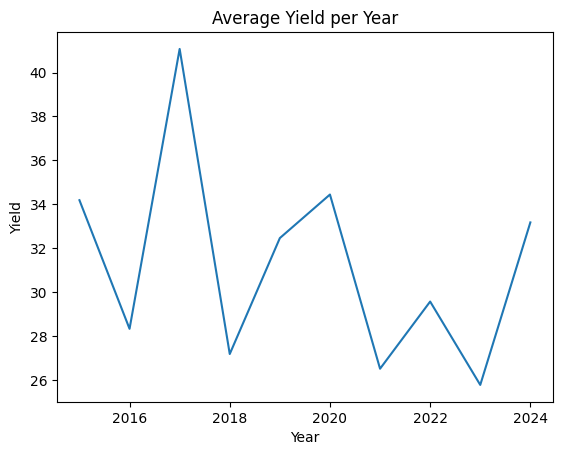

In [23]:
df_agr.groupby('Year')['Yield_quintals'].mean().plot(title='Average Yield per Year', xlabel='Year', ylabel='Yield')

### chunking and vectorizing the knowledge data

In [29]:
def load_pdf_file(data):
    loader_pdf=DirectoryLoader(data, glob="*.pdf", loader_cls=PyPDFLoader)
    documents_pdf = loader_pdf.load()

    loader_csv=DirectoryLoader(data, glob="*.csv", loader_cls=CSVLoader)
    documents_csv = loader_csv.load()
    documents = documents_pdf + documents_csv
    return documents

In [30]:
extracted_data=load_pdf_file(data="Data/")


In [31]:
len(extracted_data)

2358

In [32]:
def text_split(extracted_data):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=500,
        chunk_overlap=20,
        length_function=len,
        
    )
    texts = text_splitter.split_documents(extracted_data)
    return texts

In [33]:
text_chunks=text_split(extracted_data=extracted_data)
print(f"Total number of chunks: {len(text_chunks)}")

Total number of chunks: 15320


In [34]:
from langchain.embeddings import HuggingFaceEmbeddings
#Download the Embeddings from Hugging Face
def download_hugging_face_embeddings():
    embeddings=HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')#'sentence-transformers/all-MiniLM-L6-v2')
    return embeddings

In [35]:
embeddings = download_hugging_face_embeddings()


/var/folders/k1/x62ylx3s0ql0pz7bqk9qgm0c0000gn/T/ipykernel_32460/2751753738.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings=HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')#'sentence-transformers/all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [36]:
embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
), model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [37]:
test_embed=embeddings.embed_query("What is the capital of France?")
print(test_embed)
print(len(test_embed))

[0.49588367342948914, 0.16427527368068695, 0.06085284426808357, -0.48712125420570374, 0.16451771557331085, -0.40564531087875366, 0.15589849650859833, 0.04650790989398956, 0.10698704421520233, 0.23643726110458374, -0.10492569953203201, -0.4563884139060974, 0.3637591004371643, -0.3209633231163025, -0.36829328536987305, -0.8500544428825378, 0.14869122207164764, -0.026300210505723953, 0.2567141652107239, -0.01046764850616455, 0.5739045739173889, 0.0026893848553299904, 0.1786009669303894, 0.28206369280815125, -0.0074678268283605576, 0.034554287791252136, 0.028958098962903023, 0.32623252272605896, -0.11930465698242188, -0.25600409507751465, 0.3764117360115051, -0.23423440754413605, 0.21956931054592133, 0.001119209686294198, 0.026749679818749428, -0.23672983050346375, 0.1714496612548828, -0.6049781441688538, 0.5097869634628296, -0.20697034895420074, 0.1161944717168808, -0.007499797269701958, -0.17148634791374207, 0.03713628277182579, 0.5212003588676453, 0.2830553650856018, 0.4719786047935486,

In [41]:
from pinecone import ServerlessSpec
from pinecone import Pinecone
index_name="agri-rag-bot"


pc=Pinecone(api_key=PINECONE_API_KEY)
from pinecone import ServerlessSpec
if not pc.has_index(name=index_name):
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='dotproduct',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )
index=pc.Index(name=index_name)
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.0,
 'metric': 'dotproduct',
 'namespaces': {'': {'vector_count': 4240}},
 'total_vector_count': 4240,
 'vector_type': 'dense'}

In [42]:
documents = load_pdf_file('Data/')
text_chunks = text_split(documents)
embeddings = download_hugging_face_embeddings()
print("Proceeding with embeddings")

embedded_vectors = embeddings.embed_documents([chunk.page_content for chunk in text_chunks])
print("Embeddings generated")
# Prepare vectors for Pinecone
vectors = []
for i, (text_chunk, vector) in enumerate(zip(text_chunks, embedded_vectors)):
    vectors.append({
        "id": f"chunk-{i}",
        "values": vector,
        "metadata": {
            "text": text_chunk.page_content[:500],  # Keep metadata light!
            "source": text_chunk.metadata.get("source"),
            "page": text_chunk.metadata.get("page")
        }
    })
print("Vectors prepared for Pinecone")
# === Batch Upload Safely ===
def batch_upsert(index, vectors, batch_size=50):
    for i in range(0, len(vectors), batch_size):
        print(f"Uploading batch {i // batch_size + 1} of {len(vectors) // batch_size + 1}")
        batch = vectors[i:i+batch_size]
        index.upsert(vectors=batch)
# index_name="agri-rag-bot"
batch_upsert(index, vectors, batch_size=40)  # 40 is a safe number for 768 dim
print("✅ All chunks uploaded safely without exceeding Pinecone size limits.")

Proceeding with embeddings
Embeddings generated
Vectors prepared for Pinecone
Uploading batch 1 of 384
Uploading batch 2 of 384
Uploading batch 3 of 384
Uploading batch 4 of 384
Uploading batch 5 of 384
Uploading batch 6 of 384
Uploading batch 7 of 384
Uploading batch 8 of 384
Uploading batch 9 of 384
Uploading batch 10 of 384
Uploading batch 11 of 384
Uploading batch 12 of 384
Uploading batch 13 of 384
Uploading batch 14 of 384
Uploading batch 15 of 384
Uploading batch 16 of 384
Uploading batch 17 of 384
Uploading batch 18 of 384
Uploading batch 19 of 384
Uploading batch 20 of 384
Uploading batch 21 of 384
Uploading batch 22 of 384
Uploading batch 23 of 384
Uploading batch 24 of 384
Uploading batch 25 of 384
Uploading batch 26 of 384
Uploading batch 27 of 384
Uploading batch 28 of 384
Uploading batch 29 of 384
Uploading batch 30 of 384
Uploading batch 31 of 384
Uploading batch 32 of 384
Uploading batch 33 of 384
Uploading batch 34 of 384
Uploading batch 35 of 384
Uploading batch 36 of

PineconeApiException: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Tue, 29 Apr 2025 06:57:50 GMT', 'Content-Type': 'application/json', 'Content-Length': '132', 'Connection': 'keep-alive', 'x-pinecone-request-latency-ms': '30', 'x-pinecone-request-id': '527590921102132943', 'x-envoy-upstream-service-time': '22', 'server': 'envoy'})
HTTP response body: {"code":3,"message":"Metadata value must be a string, number, boolean or list of strings, got 'null' for field 'page'","details":[]}


In [43]:
#initializing docsearch with the existing index
from langchain_pinecone import PineconeVectorStore
docsearch=PineconeVectorStore.from_existing_index(
    index_name=index_name,
    embedding=embeddings
)

In [51]:
retriver=docsearch.as_retriever(search_type="similarity",search_kwargs={"k": 100})


In [52]:
query="What is my farm's yeild per year look like?"
retriver.invoke(input=query)

[Document(id='chunk-1412', metadata={'page': 91.0, 'source': 'Data/agropustaka.id_buku_Bovine-Medicine-Diseases-and-Husbandry-of-Cattle.pdf'}, page_content='Grass hay (average) 3.5 18\nMaize silage (average) 9 4.5\nMaintenance + 4 litres (4.5% BF) (3.5% BF)'),
 Document(id='chunk-3105', metadata={'page': 278.0, 'source': 'Data/agropustaka.id_buku_Bovine-Medicine-Diseases-and-Husbandry-of-Cattle.pdf'}, page_content='Growing Cattle'),
 Document(id='chunk-8279', metadata={'page': 832.0, 'source': 'Data/agropustaka.id_buku_Bovine-Medicine-Diseases-and-Husbandry-of-Cattle.pdf'}, page_content='Adult Cattle\nSystem and Miscellaneous Conditions'),
 Document(id='chunk-1156', metadata={'page': 61.0, 'source': 'Data/agropustaka.id_buku_Bovine-Medicine-Diseases-and-Husbandry-of-Cattle.pdf'}, page_content='Yield/day in herd (kg) 13.1 13.2 13.1 13.1 13.2\nYield/day of life (kg) 8.8 8.4 7.9 7.5 7.3'),
 Document(id='chunk-15027', metadata={'page': 31.0, 'source': 'Data/factorsaffectingmilkproductionay

In [53]:
### initilizing the LLM
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-001",
    api_key=GEMINI_API_KEY,
    temperature=0.8,
    max_tokens=1024,
    timeout=None,
    max_retries=2
)

In [55]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.vectorstores import Chroma
# from langchain.embeddings import GoogleGenerativeAIEmbeddings
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain_google_genai import ChatGoogleGenerativeAI


system_prompt=(
    "You are an aggriculture expert.Answer teh farmer's query based on the data provided to you.You have farm specific history and the knowledge texts.Answer Concisely so that the farmer can understand.{context} "
)
prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriver, question_answer_chain)

# Query
query = "How is my farm's milk production been?"
response = rag_chain.invoke({"input": query})

print(response["answer"])

I do not have access to your farm's specific milk production records to provide an answer.
